In [1]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [2]:
import pandas as pd

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Climate Analysis and Exploration

In [4]:
engine=create_engine("sqlite:///hawaii.sqlite")

In [5]:
# Reflect Database into ORM class
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# To see all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references for each one
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create a session from python to the database and inspect
session = Session(engine)
inspector = inspect(engine)

columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Precipitation Analysis

In [9]:
#first and last date item
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [10]:
last=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last

('2017-08-23')

In [11]:
# Calculate the last 12 month item of the data (365 days from the last date, ie 2017-08-23)
last_year=(dt.datetime.strptime(last[0], '%Y-%m-%d')-dt.timedelta(days=365)).date()
last_year

datetime.date(2016, 8, 23)

In [12]:
# Query to retrieve the last 12 months of data and plot it
sel = [Measurement.date,Measurement.prcp]
year_data = session.query(*sel).\
    filter(func.strftime(Measurement.date >= last_year)).\
    order_by(Measurement.date).all()

In [13]:
# convert query results to Pandas DataFrame and make date the index
df=pd.DataFrame(year_data, columns=['date', 'prcp']).dropna(how='any')
df.set_index('date', inplace=True)
df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79


In [14]:
#statistics Summary with pandas
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Text(0, 0.5, 'Precipitation level')

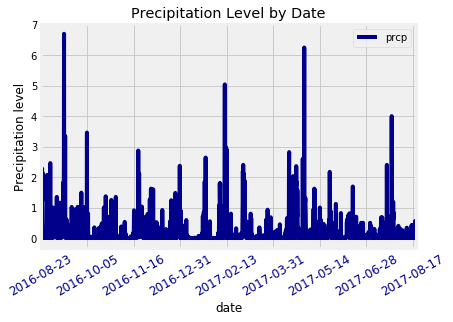

In [15]:
df.plot(x_compat=True,color='darkblue')
plt.title("Precipitation Level by Date")
plt.xticks(rotation=30,fontsize='12',color='darkblue')
plt.gcf().subplots_adjust(bottom=0.1)
plt.ylabel('Precipitation level')


* Design a query to find the most active stations.
    - List the stations and observation counts in descending order.
    - Which station has the highest number of observations?

In [16]:
available = session.query(Measurement).group_by('station').count()
print(available)

9


In [17]:
#the list of stations:
for row in session.query(Station.station, Station.name).all():
    print(row)

('USC00519397', 'WAIKIKI 717.2, HI US')
('USC00513117', 'KANEOHE 838.1, HI US')
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US')
('USC00517948', 'PEARL CITY, HI US')
('USC00518838', 'UPPER WAHIAWA 874.3, HI US')
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US')
('USC00519281', 'WAIHEE 837.5, HI US')
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US')
('USC00516128', 'MANOA LYON ARBO 785.2, HI US')


In [18]:
# Most active stations (with more rows), here we observ that station 'USC00519281', 'WAIHEE 837.5, HI US' is the one with
# the highest number of observations
mactive=session.query(Measurement.station,func.count(Measurement.date)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).all()
mactive

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

* hint: you may use functions such as func.min, func.max, func.avg, and func.count in your queries.

In [19]:
# calculate the lowest temperature recorded
lowest_temp=session.query(Measurement.station,func.min(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.min(Measurement.tobs).desc()).all()
print(f'Lowest temperatures by station')
lowest_temp

Lowest temperatures by station


[('USC00513117', 59.0),
 ('USC00514830', 58.0),
 ('USC00516128', 58.0),
 ('USC00517948', 58.0),
 ('USC00518838', 58.0),
 ('USC00519397', 56.0),
 ('USC00519523', 56.0),
 ('USC00519281', 54.0),
 ('USC00511918', 53.0)]

In [20]:
# calculate the highest temperature recorded
highest_temp=session.query(Measurement.station,func.max(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.max(Measurement.tobs).desc()).all()
print(f'Highest temperatures by station')
highest_temp

Highest temperatures by station


[('USC00511918', 87.0),
 ('USC00517948', 87.0),
 ('USC00519397', 87.0),
 ('USC00513117', 85.0),
 ('USC00514830', 85.0),
 ('USC00519281', 85.0),
 ('USC00519523', 85.0),
 ('USC00516128', 84.0),
 ('USC00518838', 83.0)]

In [21]:
# calculate the average temperature recorded
highest_temp=session.query(Measurement.station,func.avg(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.avg(Measurement.tobs).desc()).all()
print(f'Highest temperatures by station')
highest_temp

Highest temperatures by station


[('USC00514830', 74.8732970027248),
 ('USC00517948', 74.68440233236151),
 ('USC00519397', 74.55323054331865),
 ('USC00519523', 74.5436493068565),
 ('USC00518838', 72.72407045009784),
 ('USC00513117', 72.68918420081211),
 ('USC00519281', 71.66378066378067),
 ('USC00511918', 71.61596766043456),
 ('USC00516128', 70.91500765696784)]

* Design a query to retrieve the last 12 months of temperature observation data (tobs).
    - Filter by the station with the highest number of observations.
    - Plot the results as a histogram with bins=12.

In [22]:
#To obtain the information of the station with the highest number of observations:
activest=session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.date).desc()).limit(1).\
    subquery()

x_temp = session.query(*[Measurement.tobs]).\
    filter(Measurement.station==activest).\
    filter(func.strftime(Measurement.date >= last_year)).\
    group_by(Measurement.tobs).all()
x_temp=np.ravel(x_temp).astype(int)

In [23]:
x_temp

array([59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83])

In [ ]:
#Temperatures frequency
y_frec = session.query(func.count(Measurement.tobs)).\
    filter(Measurement.station==activest).\
    filter(func.strftime(Measurement.date >= last_year)).\
    group_by(Measurement.tobs).all()
y_frec=np.ravel(y_frec).astype(int)
y_frec

array([ 3,  2,  1,  6,  4,  3,  7,  5, 15, 12, 19, 22, 18, 22, 18, 39, 33,
       33, 31, 22, 18, 11,  4,  3,  1])

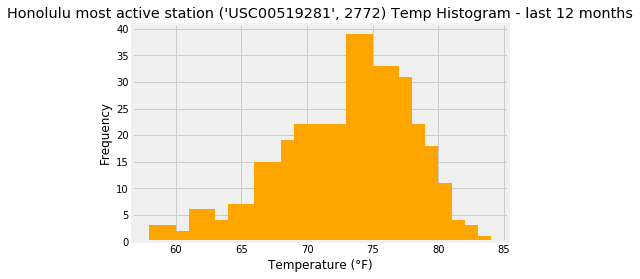

In [ ]:
#plot both variables in a histogram
fig, ax = plt.subplots()
ax.bar(x_temp,y_frec, width=2, align='center', color='orange')
ax.set_xlabel('Temperature (°F)')
ax.set_ylabel('Frequency')
ax.set_title(f'Honolulu most active station {mactive[0]} Temp Histogram - last 12 months')
plt.show()

# Other Analysis

In [ ]:
#The starter notebook contains a function called calc_temps that will accept a start date and end date
#in the format %Y-%m-%d and return the minimum, average, and maximum temperatures for that range of dates.
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d       
    Returns:
        TMIN, TAVE, and TMAX
    """   
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [ ]:
# calculate min, avg, and max temps for your trip using data from STLY. My trip could be in JUL or AUG so I take:
print(f'If temperature behaves similar as LY; Min, Avg and Max temperatures with history data from 2017-08-01 and 2017-08-08 wll be:')
tripstart='2017-07-01'
tripend='2017-08-31'
print(calc_temps(tripstart,tripend))
f= np.ravel(calc_temps('2017-07-01', '2017-08-31'))
g=np.array([f[0],f[2]])


If temperature behaves similar as LY; Min, Avg and Max temperatures with history data from 2017-08-01 and 2017-08-08 wll be:
[(69.0, 78.59298245614035, 87.0)]


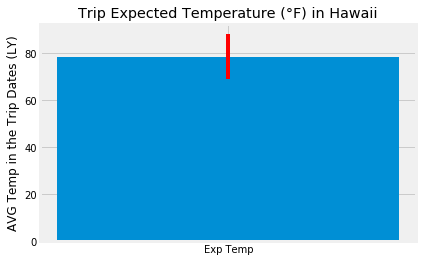

In [ ]:
#Plot the min, avg, and max temperature from your previous query as a bar chart.
#Use the average temperature as the bar height.
#Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

fig,ax = plt.subplots()

lower_error = f[0]-f[1]
upper_error = f[2]-f[1]
error = [(lower_error, upper_error)]
ax.bar(0,f[1], width=0.1,yerr=error, tick_label="Exp Temp", ecolor="red")
ax.set_ylabel('AVG Temp in the Trip Dates (LY)')
ax.set_title('Trip Expected Temperature (°F) in Hawaii')
plt.show()

In [ ]:
# Calculate the rainfall per weather station using the previous year's matching dates.

from sqlalchemy import and_, or_, not_
query0 = [Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation]
data = session.query(*query0).\
    filter(and_(func.strftime(Measurement.date >= tripstart)), (func.strftime(Measurement.date <=tripend))).\
    filter(Measurement.station == Station.station).\
    group_by(Measurement.station).\
    order_by(Measurement.prcp.desc()).all() ##why is this not sorting in desc() as instructed??
data

[('USC00516128', 18.320000000000007, 21.3331, -157.8025, 152.4),
 ('USC00519281', 4.279999999999999, 21.45167, -157.84888999999998, 32.9),
 ('USC00513117', 2.16, 21.4234, -157.8015, 14.6),
 ('USC00519397', 0.48000000000000004, 21.2716, -157.8168, 3.0),
 ('USC00514830', 2.7999999999999994, 21.5213, -157.8374, 7.0),
 ('USC00517948', 0.01, 21.3934, -157.9751, 11.9),
 ('USC00519523', 0.85, 21.33556, -157.71139, 19.5)]

In [ ]:
# Calculate the daily normals, which means avg for min, max and avg for all data in a specific day

def daily_normals(date):
    """Daily Normals.    
    Args:
        date (str): A date string in the format '%m-%d'       
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax    
    """    
    query1 = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*query1).filter(func.strftime("%m-%d", Measurement.date) == date).all()   
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
from datetime import datetime
# start and end dates for the range of dates, defined already
dates=pd.date_range(
    start=tripstart,
    end=tripend,
    periods=None,
    freq=None,
    tz=None,
    normalize=False,
    name=None,
    closed=None)

In [ ]:
date_list=[]
min_list=[]
avg_list=[]
max_list=[]
for i in dates:
    
    time=datetime.strftime(i,"%m-%d")
    date_list.append(time)
    # Loops through the list of strings in "time" to get the normals
    n=daily_normals(time)
    min_list.append(n[0][0])
    avg_list.append(n[0][1])
    max_list.append(n[0][2])

In [ ]:
# converts the previous query results into Pandas DataFrame aand make the dates as the index

trip_temperature = pd.DataFrame(
    {'Date': date_list,
     'Min Temp': min_list,
     'Avg Temp': avg_list,
     'Max Temp': max_list,
    }).set_index('Date')
trip_temperature

,Min Temp,Avg Temp,Max Temp
Date,,,
07-01,67.0,74.777778,81.0
07-02,68.0,75.403846,82.0
07-03,68.0,75.320755,87.0
07-04,70.0,76.571429,81.0
07-05,66.0,75.000000,81.0
07-06,69.0,75.000000,81.0
07-07,69.0,74.910714,82.0
07-08,69.0,76.083333,83.0
07-09,68.0,76.192982,83.0


In [ ]:
trip_temperature.describe()

,Min Temp,Avg Temp,Max Temp
count,62.000000,62.000000,62.000000
mean,68.612903,76.249483,83.048387
std,1.730676,0.560432,1.442078
min,61.000000,74.777778,81.000000
25%,68.000000,75.968782,82.000000
50%,69.000000,76.323357,83.000000
75%,69.750000,76.579221,84.000000
max,72.000000,77.351852,87.000000


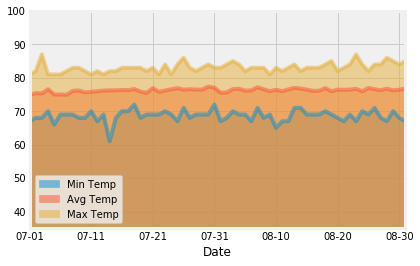

In [ ]:
# Plot daily normals in the selected Trip Dates (July and August)
graph = trip_temperature.plot.area(stacked=False).set_ylim(35,100)

# step 2

In [ ]:
# Connect to the Python data base
engine = create_engine('sqlite:///hawaii.sqlite', echo=False, connect_args = {'check_same_thread':False})

In [ ]:
Base = automap_base()
# Reflect the created database into ORM classes
Base.prepare(engine, reflect=True)

In [ ]:
# Save a reference to the measurenment table 
Measurement = Base.classes.measurement

# Save a reference to the station table 
Station = Base.classes.station

In [ ]:
# Create the session from Python to the DB
session = Session(engine)

# to get the date a year from the last date with the variable last_year previously created
twelve_months_ago = last_year - dt.timedelta(days=365)

In [ ]:
twelve_months_ago

datetime.date(2015, 8, 24)

In [ ]:
#####

In [ ]:
from flask import Flask, jsonify
app = Flask(__name__)

In [ ]:
@app.route("/")
def home():
        return (
        "<h1>Hawaii Weather App</h1>"
        f"These are the Available Routes:<br/>"
        f"/api/v1.0/precipitation<br/>"
        f"/api/v1.0/stations<br/>"
        f"/api/v1.0/tobs<br/>"
        f"/api/v1.0/<start><br/>"
        f"/api/v1.0/<start>/<end>"
    )

In [ ]:
@app.route("/api/v1.0/precipitation")
def precipitation():
    # Create the session from Python to the database
    session = Session(engine)

    """Return a list of all measurments"""
    # Query all 
    results = session.query(Measurement.date, Measurement.prcp).all()

    session.close()

    # Create a dictionary from the row data and append to a list of all_measurments
    all_measurements = []
    for date, prcp in results:
        measurement_dict = {}
        measurement_dict["date"] = date
        measurement_dict["percipitation"] = prcp
        all_measurements.append(measurement_dict)

    return jsonify(all_measurements)

In [ ]:
@app.route("/api/v1.0/stations")
def stations():
  
    # Query all
    results = session.query(Station).all()

    session.close()
    
    #jsonify
    
    stations_set = []
    for station in results:
        stations_element = station
        stations.append(station)
        
    return jsonify(stations_set)

In [ ]:
@app.route("/api/v1.0/tobs")
def tobs():

   # Query all the stations and for the given date. 

    results = session.execute(
        "SELECT date, station, tobs FROM measurement WHERE date > '{}' GROUP BY  date ORDER BY station".format(twelve_months_ago))
    tobs_list = []
    
    for tob in results:

        tobs_dict={}
        tobs_dict["date"] = tob.date
        tobs_dict["station"]= tob.station
        tobs_dict["temperature"] = tob.tobs
        tobs_list.append(tobs_dict)

    return jsonify(tobs_list)


In [ ]:
@app.route("/api/v1.0/<start>")
def startdate(start):
    
    # Start Date
    last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
    last_date = str(last_date)
    last_date = last_date[2:]
    last_date = last_date[:-3]
    
    result = calc_temp(start, last_date, session)
    
    return jsonify(result)

In [ ]:
@app.route("/api/v1.0/<start>/<end>")
def datestartend(start, end):
    
    result = calc_temp(start, end, session)
    
    return jsonify(result)
    
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
